In [1]:
import numpy as np
from scipy import stats

class Mahalanobis:

    def fit(self, X):
        self.mu = np.mean(X, axis=0)
        self.sigma = np.cov(X.T)
        self.threshold = stats.chi2.interval(0.99, 1)[1]

    def predict(self, X):
        anom_score = []
        for x in X:
            score =  np.dot(np.dot((x-self.mu).T, np.linalg.inv(self.sigma)), x-self.mu)
            anom_score.append(score)
        return [1 if score > self.threshold else 0 for score in anom_score]

/Users/habakan/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
/Users/habakan/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


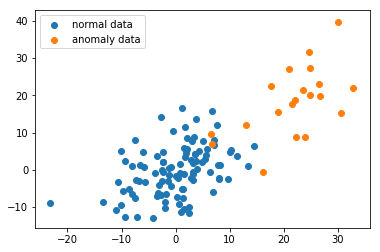

In [3]:
from numpy.random import *
from matplotlib import pyplot as plt
 
mu = [0, 0]
sigma = [[30, 10], [20, 50]]
 
anormal_mu = [20, 20]

# normal_data
X = multivariate_normal(mu, sigma, 100)

# anomaly_data
anom = multivariate_normal(anormal_mu, sigma, 20)
 
plt.scatter(X[:,0], X[:,1], label="normal data")
plt.scatter(anom[:,0], anom[:,1], label="anomaly data")

plt.legend()

plt.show()

In [4]:
# learing
model = Mahalanobis()
model.fit(X)

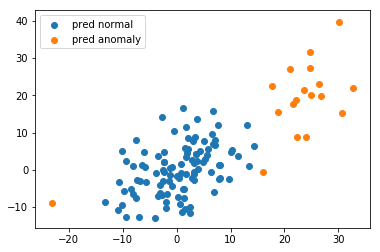

In [5]:
pred = np.concatenate([X, anom])
label = np.array(model.predict(pred))
normal_pred = pred[label==0]
anomaly_pred = pred[label==1]

plt.scatter(normal_pred[:,0], normal_pred[:,1], label="pred normal")
plt.scatter(anomaly_pred[:,0], anomaly_pred[:,1], label="pred anomaly")
plt.legend()
plt.show()